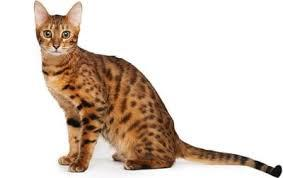

In [17]:
import torchvision
from torchvision.datasets import ImageFolder
import torch
dataset = ImageFolder('/home/bubbles/Quantbit Internship/train')
dataset.classes
from IPython.display import display

display(dataset[201][0])


In [12]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
import tensorflow_addons as tfa

# Data loading
from glob import glob
from tqdm import tqdm 
import tensorflow.image as tfi
import tensorflow.data as tfd
from keras.preprocessing.image import load_img

# Data Visualization 
import plotly.express as px
import matplotlib.pyplot as plt

# Model Building 
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import GlobalAveragePooling2D as GAP2D

# Model Backbones
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNet

# Model Callbacks
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard

# Optimizers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

# Learning rate schedulers
from tensorflow_addons.optimizers import CyclicalLearningRate
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Hyperparameters Search 
from keras_tuner import Hyperband



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

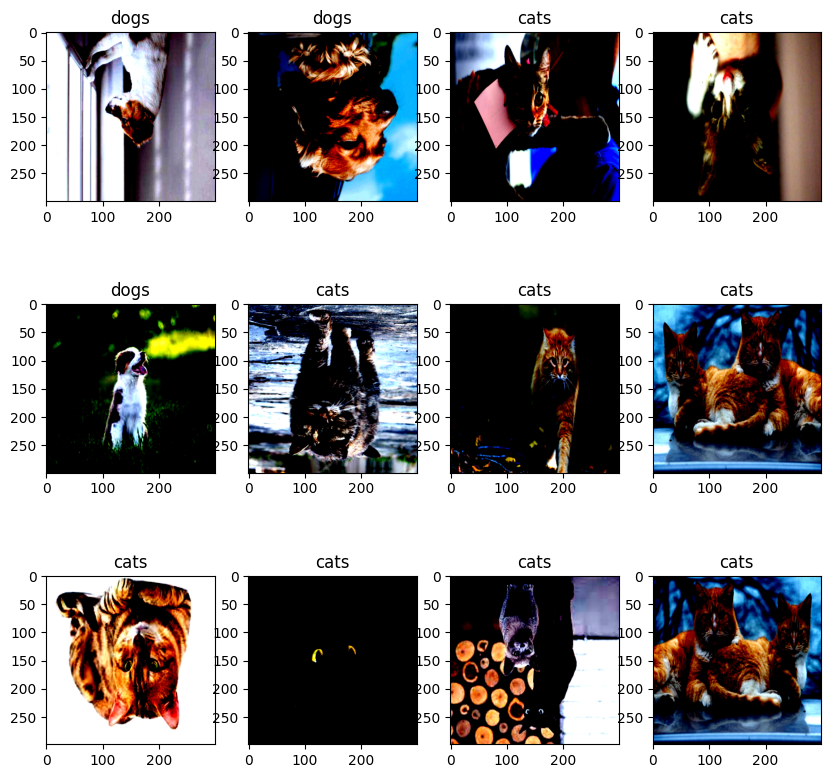

In [18]:
len(dataset)
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.Resize((299,299) ),
                                transforms.RandomVerticalFlip(),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor()])
train_dataset = ImageFolder('/home/bubbles/Quantbit Internship/train', transform = transform)
train_dataset[0][0].shape
torch.mean(train_dataset[0][0],dim = (1,2))
torch.concat((train_dataset[0][0],train_dataset[1][0]), dim = 1 ).shape
torch_concatinated = torch.concat([data[0] for data in train_dataset], dim = 1)
torch_concatinated.shape
mean = torch.mean(torch_concatinated, dim = (1,2))
mean
std_dev =torch.std(torch_concatinated, dim = (1,2))
additional_transform = transforms.Compose([
    transforms.Normalize(mean, std_dev)
])

train_dataset.transform.transforms.append(additional_transform)
train_dataset[0][0]
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
columns = 4
rows = 3
for i in range(1, columns * rows + 1):
    idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[idx]
    class_name = train_dataset.classes[label]
    fig.add_subplot(rows, columns, i)
    plt.title(class_name)
    plt.imshow(img.permute(1, 2, 0))
plt.show()

In [11]:
pip install keras_tuner

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 KB 473.5 kB/s eta 0:00:00 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
test_dataset = ImageFolder('/home/bubbles/Quantbit Internship/test', transform = transforms.Compose([
    transforms.Resize((255, 255)),
    transforms.ToTensor()
    ,additional_transform
]))
test_dataset

Dataset ImageFolder
    Number of datapoints: 140
    Root location: /home/bubbles/Quantbit Internship/test
    StandardTransform
Transform: Compose(
               Resize(size=(255, 255), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Compose(
               Normalize(mean=tensor([0.5875, 0.5591, 0.4995]), std=tensor([0.2902, 0.2877, 0.3091]))
           )
           )

In [23]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
#from torchvision.models import Xception
from tqdm import tqdm

# Define a simple Xception-like model
class Xception(nn.Module):
    def __init__(self, num_classes=2):
        super(Xception, self).__init__()

        # Define the Xception architecture
        self.features = Xception(pretrained=False)  # You can use a pre-trained Xception model if needed
        self.features.fc = nn.Identity()  # Remove the final fully connected layer
        self.classifier = nn.Linear(2048, num_classes)  # Add a new classification layer

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Define your datasets and dataloaders (replace with your actual datasets)
transform = transforms.Compose([
    transforms.Resize((299, 299)),  # Xception requires input images to be 299x299
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder('/home/bubbles/Quantbit Internship/train', transform=transform)
test_dataset = datasets.ImageFolder('/home/bubbles/Quantbit Internship/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=2)

# Initialize the Xception model
model = Xception(num_classes=2)

# Use multiple GPUs if available
if torch.cuda.device_count() > 1:
    print("Using", torch.cuda.device_count(), "GPUs!")
    model = nn.DataParallel(model)

# Move the model to the available device (GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in tqdm(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track train loss and accuracy
        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate train accuracy and loss
    train_accuracy = correct_train / total_train
    train_loss = train_loss / total_train

    # Print epoch results
    print(f"Epoch {epoch + 1}/{num_epochs} - Train Loss: {train_loss:.4f} - Train Acc: {train_accuracy:.4f}")


TypeError: Xception.__init__() got an unexpected keyword argument 'pretrained'

In [26]:
import torch
import torch.nn as nn
import timm  # Import the timm library for models
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm

# Define a simple Xception-like model using timm
class Xception(nn.Module):
    def __init__(self, num_classes=2):
        super(Xception, self).__init__()

        # Load the Xception model from timm
        self.features = timm.create_model('xception', pretrained=False)
        self.features.reset_classifier(num_classes=num_classes)

    def forward(self, x):
        x = self.features(x)
        return x

# Rest of your code remains unchanged

# Initialize the Xception model
model = Xception(num_classes=2)

# Use multiple GPUs if available
if torch.cuda.device_count() > 1:
    print("Using", torch.cuda.device_count(), "GPUs!")
    model = nn.DataParallel(model)

# Move the model to the available device (GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


/home/bubbles/.local/lib/python3.10/site-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name xception to current legacy_xception.
  model = create_fn(


Xception(
  (features): Xception(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act2): ReLU(inplace=True)
    (block1): Block(
      (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (skipbn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (rep): Sequential(
        (0): SeparableConv2d(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
          (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        )
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace

In [25]:
pip install timm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:01:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 1.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.3/330.3 KB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm
import timm

# Define a simple Xception-like model using timm
class Xception(nn.Module):
    def __init__(self, num_classes=2):
        super(Xception, self).__init__()

        # Load the Xception model from timm
        self.features = timm.create_model('xception', pretrained=False)
        self.features.fc = nn.Identity()  # Remove the final fully connected layer
        self.classifier = nn.Linear(2048, num_classes)  # Add a new classification layer

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Define your datasets and dataloaders (replace with your actual datasets)
transform = transforms.Compose([
    transforms.Resize((299, 299)),  # Xception requires input images to be 299x299
    transforms.ToTensor(),
])

# Replace 'path_to_train_data' and 'path_to_test_data' with your actual dataset paths
train_dataset = datasets.ImageFolder('/home/bubbles/Quantbit Internship/train', transform=transform)
test_dataset = datasets.ImageFolder('/home/bubbles/Quantbit Internship/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=2)

# Initialize the Xception model
model = Xception(num_classes=2)

# Use multiple GPUs if available
if torch.cuda.device_count() > 1:
    print("Using", torch.cuda.device_count(), "GPUs!")
    model = nn.DataParallel(model)

# Move the model to the available device (GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in tqdm(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track train loss and accuracy
        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate train accuracy and loss
    train_accuracy = correct_train / total_train
    train_loss = train_loss / total_train

    # Print epoch results
    print(f"Epoch {epoch + 1}/{num_epochs} - Train Loss: {train_loss:.4f} - Train Acc: {train_accuracy:.4f}")
